In [1]:
import pandas as pd
import numpy as np


In [3]:
x=np.array([2,1])
np.linalg.norm(x)

2.23606797749979

In [4]:
a=np.array([-1,1])
b=np.array([1,1])
a@b

0

# CF 기반 추천 시스템
* CF : 유사도 기반의 평점 예측, 영화 추천, 음악 추천 등에 활용된다
* CF 종류

  1)사용자 기반 
  
  2)아이템 기반(하이브리드) : 사용자에 대한 정보가 부족하거나 여러 트랜젝션에서 중복 아이템이 적은 경우 적합하다
  
  ex) 홍길동(트랜젝션) : A, B 음악 / 임꺽정 : C, D 음악 ---> 홍길동에게 음악 추천? 중복되는 음악이 없어서 추천하기 어렵다
                                                        ---> 중복되는 아이템이 적은 경우, 사용자 정보를 분석하여 
                                                             비슷한 사용자가 듣는 음악을 추천한다

In [5]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'암수살인':2.5, '바울':2, '할로윈':1},
    '나훈아':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [ ]:
'''
평점 기반으로 가장 비슷한 사람은 누구일까?
손흥민과 가장 비슷한 사람은?

영화를 차원으로 생각하면, 
손흥민 2차원 데이터/ BTS 3차원 데이터간의 '평점'을 비교함으로써 유클리디안 디스턴스를 구한다
'''

In [6]:
critics

{'BTS': {'암수살인': 5, '바울': 4, '할로윈': 1.5},
 '손흥민': {'바울': 5, '할로윈': 2},
 '조용필': {'암수살인': 2.5, '바울': 2, '할로윈': 1},
 '나훈아': {'암수살인': 3.5, '바울': 4, '할로윈': 5}}

In [10]:
### critics.get('BTS')와 critics['BTS']의 차이??
print(critics.get('BTS2')) # None
print(critics['BTS2']) # 에러

{'암수살인': 5, '바울': 4, '할로윈': 1.5}
{'암수살인': 5, '바울': 4, '할로윈': 1.5}


#### 피타고라스의 정리(2차원)

In [11]:
from math import sqrt
sqrt(pow(1,2)+pow(3,2)) # pow: 제곱 sqrt:제곱근

3.1622776601683795

In [13]:
# 유사도를 구해주는 함수
def sim(i,j): 
    return sqrt(pow(i,2)+pow(j,2))

In [14]:
var1 = critics['손흥민']['바울']-critics['조용필']['바울'] # 바울이란 영화에 대한 두 사람의 평점 차이
var2 = critics['손흥민']['할로윈']-critics['조용필']['할로윈'] 
sim(var1, var2)

3.1622776601683795

In [21]:
# 손흥민을 대상으로 다른 사람들과의 유사도
for i in critics: # i에는 critics의 key값이 하나씩 들어간다
    if i != '손흥민':
        var1 = critics['손흥민']['바울']-critics[i]['바울'] # 바울이란 영화에 대한 두 사람의 평점 차이
        var2 = critics['손흥민']['할로윈']-critics[i]['할로윈'] 
#         print(i ,":", sim(var1, var2))
        print(i ,":", 1/(1+sim(var1, var2))) # 정규화 해준다 --> 1에 가까울수록 유사하다
        
        
# 이렇게 구현했을 경우, 
# 특정 영화에 대한 평점에 의해 거리 차이가 심해질 수 있다.
# ex) 손흥민 BTS 9편은 동일한 평점을 주고, 1편의 영화만 0점/ 100점으로 극명하게 점수에 차이를 줬다면,
#     하나의 영화로 인해 거리가 10이 되어버린다.

BTS : 0.4721359549995794
조용필 : 0.2402530733520421
나훈아 : 0.2402530733520421


In [27]:
# 유클리디안 기반 거리(같은 영화에 대해서만 계산이 수행되어야 함)
def sim_dist(a,b,c): # a영화 b,c가 사용자
    rsum=0 # 두 사용자의 영화에 대한 평점의 총 합
    for i in a[b]: # i에는 b가 본 a영화가 들어간다
        if i in a[c]: # c가 본 a영화에 i가 있다면
            rsum += pow(a[b][i]-a[c][i],2)
#             var1 = critics[b][a] -critics[c][a]
    return (1+sim(sqrt(rsum)))


sim_dist(critics, '손흥민','BTS')

TypeError: sim() missing 1 required positional argument: 'j'

In [25]:
# 인원에 상관없이 
# 정렬하여 가장 유사한 상위 n명을 추출하는 기능 (평점을 가장 유사하게 준 n명)

# top_match(영화평점딕셔너리, 기준이 되는 사람, 상위n명, 적용 함수) 형태로 구현
def top_match(data, name, n=2, sim_f=sim_dist): # n=2은 기본 2명을 반환하겠다는 말이다 #sim_f란 이름으로 sim_dist란 함수를 쓰겠다
    myList=[] # 상위 n명을 저장하는 빈 리스트 
    for i in data:
        if name != i:
            myList.append((sim_f(data,name,i),i))
#             val = sim_f(data[i], name, i)
#             print(val)
#             val.sort(ascending=False)
        myList.sort()
        myList.reverse()
        return myList[:n]
#     return print(val,i)
    
top_match(critics, '손흥민')

# 유사도,이름 형태로 출력

TypeError: sim() missing 1 required positional argument: 'j'

In [33]:
critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '강감찬': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '을지문덕': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '김유신': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '유성룡': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '이황': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}

In [56]:
for i in range(8):
    print(critics)

{'조용필': {'택시운전사': 2.5, '겨울왕국': 3.5, '리빙라스베가스': 3.0, '넘버3': 3.5, '사랑과전쟁': 2.5, '세계대전': 3.0}, 'BTS': {'택시운전사': 1.0, '겨울왕국': 4.5, '리빙라스베가스': 0.5, '넘버3': 1.5, '사랑과전쟁': 4.5, '세계대전': 5.0}, '강감찬': {'택시운전사': 3.0, '겨울왕국': 3.5, '리빙라스베가스': 1.5, '넘버3': 5.0, '세계대전': 3.0, '사랑과전쟁': 3.5}, '을지문덕': {'택시운전사': 2.5, '겨울왕국': 3.0, '넘버3': 3.5, '세계대전': 4.0}, '김유신': {'겨울왕국': 3.5, '리빙라스베가스': 3.0, '세계대전': 4.5, '넘버3': 4.0, '사랑과전쟁': 2.5}, '유성룡': {'택시운전사': 3.0, '겨울왕국': 4.0, '리빙라스베가스': 2.0, '넘버3': 3.0, '세계대전': 3.5, '사랑과전쟁': 2.0}, '이황': {'택시운전사': 3.0, '겨울왕국': 4.0, '세계대전': 3.0, '넘버3': 5.0, '사랑과전쟁': 3.5}, '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0, '넘버3': 4.0}}
{'조용필': {'택시운전사': 2.5, '겨울왕국': 3.5, '리빙라스베가스': 3.0, '넘버3': 3.5, '사랑과전쟁': 2.5, '세계대전': 3.0}, 'BTS': {'택시운전사': 1.0, '겨울왕국': 4.5, '리빙라스베가스': 0.5, '넘버3': 1.5, '사랑과전쟁': 4.5, '세계대전': 5.0}, '강감찬': {'택시운전사': 3.0, '겨울왕국': 3.5, '리빙라스베가스': 1.5, '넘버3': 5.0, '세계대전': 3.0, '사랑과전쟁': 3.5}, '을지문덕': {'택시운전사': 2.5, '겨울왕국': 3.0, '넘버3': 3.5, '세계대전': 4.0}, '김유신': {'겨울왕국': 3.5, '리빙라스베가스': 3.0, '세

#### 한글 깨지지 않게 출력, 경고문 무시하는 코드

In [28]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [29]:
import matplotlib.pylab as plt

[0, 5, 0, 5]

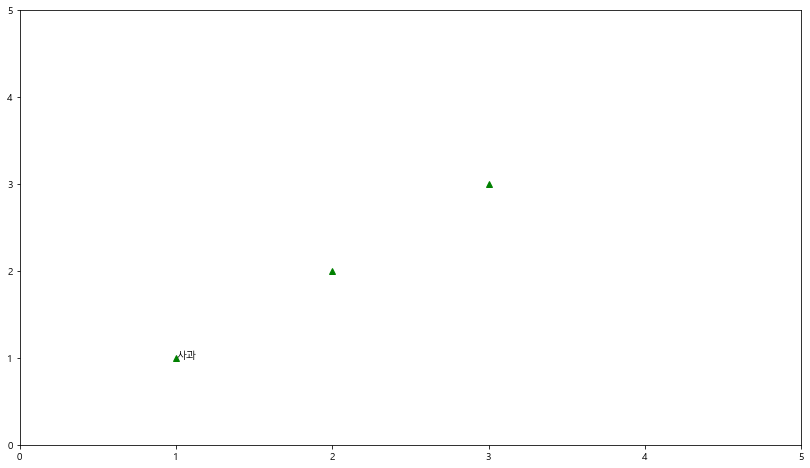

In [32]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^') # 그린색상의 삼각형 도형 출력
plt.text(1,1,'사과') # 1,1위치에 '사과'라는 텍스트 출력
plt.axis([0,5,0,5])

In [35]:
critics['을지문덕']#['넘버3']

{'택시운전사': 2.5, '겨울왕국': 3.0, '넘버3': 3.5, '세계대전': 4.0}

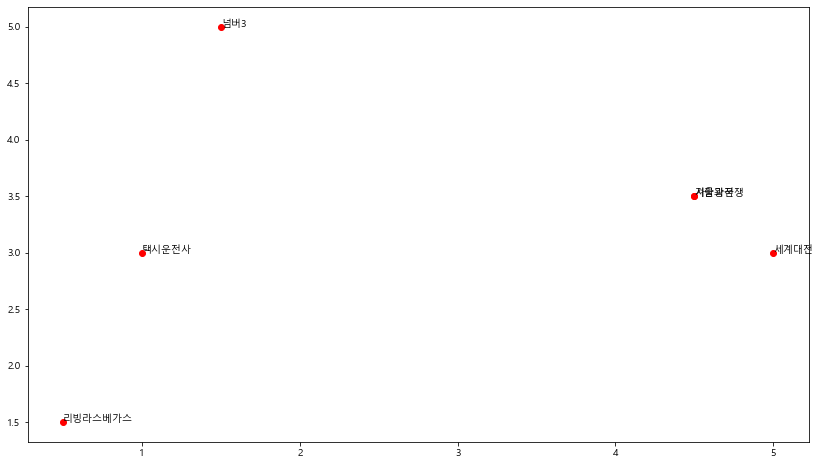

In [38]:
# 시각화 시켜주는 함수
def drawGraph(data,name1,name2):
    li1=[]
    li2=[]
    plt.figure(figsize=(14,8))
    for i in data[name1]:
        if i in data[name2]:
            li1.append(data[name1][i]) # data[name][i]는 영화 평점을 의미한다
            li2.append(data[name2][i])
            plt.text(data[name1][i],data[name2][i],i)
    plt.plot(li1,li2,'ro')
 
drawGraph(critics,'BTS','강감찬')

In [41]:
def sim_pearson(data,name1,name2):
    # 상관계수 계산
    # 리턴
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))


In [42]:
print(sim_pearson(critics,'BTS','강감찬'))

# 두 사람의 상관계수 출력
# 'BTS'와 나머지 사람들간의 상관계수 출력
# 전체에 대한 상관계수 

0.21693045781865616


In [44]:
def top_match(data, name, n=3, sim_f=sim_pearson): # n=2은 기본 2명을 반환하겠다는 말이다 #sim_f란 이름으로 sim_dist란 함수를 쓰겠다
    myList=[] # 상위 n명을 저장하는 빈 리스트 
    for i in data:
        if name != i:
            myList.append((sim_f(data,name,i),i))
    myList.sort()
    myList.reverse()
    return myList[:n]

In [46]:
top_match(critics,'강감찬',3)

[(0.963795681875635, '이황'),
 (0.39605901719066977, '조용필'),
 (0.38124642583151164, '이이')]

### Mission

추천 시스템

1) 예상 평점을 구해보자 (예상 점수: 유사도*(상대방의 평점))

   ex) 강감찬이 안본 영화 중 'A'영화를 다른 사람들은 각각 4,3,2점 주었다면,
   
        유사도를 구해보니 각각 0.9,0.3,0.7로 나왔을 때,
        
        0.9점 *4점 ==> 3.6점 예상
        
        0.3점 *3점 ==> 0.9점 예상
        
        0.7점 *2점 ==> 1.4점 예상
        
       예상 점수 총합 = 5.9(예상 총합) / 1.9점(유사도 합)  --> 평균 약 3점 예상됨
        
        만약 A,B,C 영화 각각 3,2,4점으로 예상되었다면,
        강감찬에게는 'C'영화를 추천한다

In [ ]:
def sim_pearson(data,name1,name2):
    # 상관계수 계산
    # 리턴
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))


def exp_score(data,user1,user2):
    expList = []
    max_score=0
    for i in data['user1']: # i : user1이 본 영화
        if i != data['user2']: # i가 user2가 본 영화와 같지 않다면(못 본 영화라면)
            #안 본 영화에 대한 평균 총점 구하기
            sum_expScore = data['user2'][i] *(sim_pearson(i, user1,user2))
            sum_simScore = sim_pearson(i, user1,user2)
            avg_expScore = sum_expScore / sum_simScore
            expList = avg_expScore
    return expList.max()

exp_score(critics,'이이')